In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_excel('Beans_Multiclass_Classification.xlsx')
df.shape

(13611, 17)

In [3]:
#Dropping duplicates
df=df.drop_duplicates()
df.shape

(13543, 17)

In [4]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [47]:
df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
7312,64828,1021.970,419.963738,198.574193,2.114896,0.881150,65825,287.300493,0.728593,0.984854,0.780003,0.684108,0.006478,0.000875,0.468004,0.989779,HOROZ
6611,54982,916.327,373.116609,188.361850,1.980850,0.863217,55548,264.585065,0.759787,0.989811,0.822867,0.709122,0.006786,0.001058,0.502854,0.996077,HOROZ
7251,63210,1002.819,416.975741,194.953880,2.138843,0.883971,64194,283.692565,0.655875,0.984671,0.789861,0.680357,0.006597,0.000872,0.462886,0.990041,HOROZ
7878,40473,758.799,275.291366,187.724137,1.466468,0.731435,40976,227.006220,0.700249,0.987725,0.883328,0.824603,0.006802,0.001940,0.679971,0.997155,SIRA
2190,58260,952.149,319.515904,232.967057,1.371507,0.684380,59309,272.358102,0.735402,0.982313,0.807552,0.852409,0.005484,0.001786,0.726600,0.996537,BARBUNYA
10998,28752,638.213,243.653693,150.466624,1.619321,0.786537,29057,191.332651,0.684425,0.989503,0.887047,0.785265,0.008474,0.001988,0.616641,0.998539,DERMASON
320,35272,682.696,232.130231,193.597548,1.199035,0.551758,35619,211.919101,0.779923,0.990258,0.951010,0.912932,0.006581,0.002820,0.833445,0.999329,SEKER
12567,34869,717.611,255.639160,174.652912,1.463698,0.730230,35547,210.704983,0.783080,0.980927,0.850886,0.824228,0.007331,0.002087,0.679352,0.994366,DERMASON
133,33576,666.339,224.588725,190.463018,1.179172,0.529912,33927,206.761435,0.761792,0.989654,0.950273,0.920623,0.006689,0.002964,0.847546,0.999403,SEKER
1062,39420,720.487,251.859209,199.796688,1.260577,0.608848,39812,224.033709,0.740421,0.990154,0.954276,0.889520,0.006389,0.002467,0.791245,0.997426,SEKER


In [23]:
df.head(3)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(14), i

In [5]:
#Outlier Treatment. Not treating outlier for now.
#Treating outliers
def list_treat_outliers_quantile(df, col, lower_quantile, upper_quantile):
    display("==============start======================")
    lower = df[col].quantile(lower_quantile)
    upper = df[col].quantile(upper_quantile)
    df_outliers=df[(df[col]<lower) | (df[col]>upper)]
    outlier_count=df_outliers.shape[0]
    total_count=df.shape[0]
    #df[col] = df[col].clip(lower, upper)
    ratio=outlier_count/total_count
    print('col=',col,'lower_quantile=',lower,' upper_quantile=',upper,'df_outliers.count=',outlier_count,'total records=',total_count,' ratio=',ratio)
    print('outliers=',df_outliers[col])
    display("==============end======================")

for col in df.select_dtypes(include='number').columns:
    list_treat_outliers_quantile(df, col, .01,.99)

'==============start======================'

col= Area lower_quantile= 24308.26  upper_quantile= 186418.4 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3735     186431
3736     186439
3737     186509
3738     186519
3739     186542
          ...  
10196     24256
10197     24257
10198     24258
10199     24277
10200     24307
Name: Area, Length: 272, dtype: int64


'==============end======================'

'==============start======================'

col= Perimeter lower_quantile= 577.63802  upper_quantile= 1654.24528 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3673     1655.841
3676     1663.533
3687     1672.524
3689     1662.937
3696     1655.890
           ...   
10256     572.216
10262     574.555
10281     575.308
10297     574.473
10310     577.625
Name: Perimeter, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= MajorAxisLength lower_quantile= 210.10342516607938  upper_quantile= 628.3276885007147 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 0        208.178117
1        200.524796
4        201.847882
25       210.045682
85       209.693293
            ...    
10470    204.016847
10500    207.170053
10536    207.566043
10592    209.236366
10689    209.778985
Name: MajorAxisLength, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= MinorAxisLength lower_quantile= 144.01934372371534  upper_quantile= 387.4784733548425 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3488     389.932857
3513     407.860716
3565     397.555032
3571     408.342566
3583     394.211968
            ...    
10562    143.700258
10615    141.243409
10683    142.788093
10771    141.404470
11601    141.980801
Name: MinorAxisLength, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= AspectRation lower_quantile= 1.1389524430899323  upper_quantile= 2.204510270365351 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 1       1.097356
4       1.060798
11      1.117665
14      1.132879
18      1.132851
          ...   
7362    2.273526
7364    2.211736
7372    2.221488
7380    2.211951
7416    2.211116
Name: AspectRation, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= Eccentricity lower_quantile= 0.47866102569595126  upper_quantile= 0.8911974686553663 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 1       0.411785
4       0.333680
11      0.446622
14      0.469924
18      0.469883
          ...   
7362    0.898073
7364    0.891950
7372    0.892954
7380    0.891973
7416    0.891886
Name: Eccentricity, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= ConvexArea lower_quantile= 24637.72  upper_quantile= 188925.15999999997 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3698     189173
3717     189905
3733     189236
3734     191438
3735     189926
          ...  
10201     24576
10203     24623
10204     24630
10205     24612
10210     24631
Name: ConvexArea, Length: 272, dtype: int64


'==============end======================'

'==============start======================'

col= EquivDiameter lower_quantile= 175.92679689858332  upper_quantile= 487.19121335662425 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3735     487.207678
3736     487.218131
3737     487.309588
3738     487.322651
3739     487.352697
            ...    
10196    175.737584
10197    175.741206
10198    175.744829
10199    175.813641
10200    175.922237
Name: EquivDiameter, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= Extent lower_quantile= 0.6028406610320673  upper_quantile= 0.825965739784903 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 368      0.826104
2239     0.834159
2297     0.828260
2447     0.840577
2759     0.827343
           ...   
12161    0.828045
12524    0.827182
12686    0.835628
13261    0.832817
13275    0.828791
Name: Extent, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= Solidity lower_quantile= 0.9698956872467323  upper_quantile= 0.9930097817144671 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 177      0.993079
181      0.993783
210      0.993370
271      0.919246
305      0.993609
           ...   
12017    0.968286
12116    0.963180
12121    0.954549
13454    0.993629
13592    0.993278
Name: Solidity, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= roundness lower_quantile= 0.7190770941902191  upper_quantile= 0.9732692529662493 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 4        0.984877
19       0.976511
20       0.973460
33       0.976947
34       0.980968
           ...   
10928    0.632321
11459    0.666121
11902    0.691447
11907    0.489618
12116    0.666784
Name: roundness, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= Compactness lower_quantile= 0.6713757510416064  upper_quantile= 0.9362232558533311 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 1       0.953861
4       0.970516
11      0.945254
14      0.939219
18      0.939238
          ...   
7372    0.669092
7373    0.670913
7380    0.670691
7384    0.669661
7416    0.667020
Name: Compactness, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= ShapeFactor1 lower_quantile= 0.0033129214946034024  upper_quantile= 0.00887408264664447 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 3488     0.003275
3513     0.003140
3565     0.003214
3571     0.003125
3583     0.003239
           ...   
10615    0.009079
10683    0.008944
10771    0.009017
10890    0.008906
11601    0.009000
Name: ShapeFactor1, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= ShapeFactor2 lower_quantile= 0.000746732389024112  upper_quantile= 0.0030522278122058362 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 0        0.003147
1        0.003564
3        0.003215
4        0.003665
5        0.003153
           ...   
10342    0.003241
10422    0.003225
10443    0.003139
10470    0.003107
11454    0.003060
Name: ShapeFactor2, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= ShapeFactor3 lower_quantile= 0.4507453991439287  upper_quantile= 0.8765139848594677 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 1       0.909851
4       0.941900
11      0.893506
14      0.882132
18      0.882167
          ...   
7372    0.447684
7373    0.450124
7380    0.449827
7384    0.448446
7416    0.444916
Name: ShapeFactor3, Length: 272, dtype: float64


'==============end======================'

'==============start======================'

col= ShapeFactor4 lower_quantile= 0.9786892918980935  upper_quantile= 0.9993646618001943 df_outliers.count= 272 total records= 13543  ratio= 0.02008417632725393
outliers= 10       0.999384
29       0.999515
31       0.999481
46       0.999401
48       0.999538
           ...   
11332    0.999454
11907    0.976325
12092    0.999500
12634    0.999419
13592    0.999546
Name: ShapeFactor4, Length: 272, dtype: float64


'==============end======================'

In [6]:
# Split data into X and Y
X=df.drop('Class', axis=1)
y=df['Class']

<Figure size 640x480 with 0 Axes>

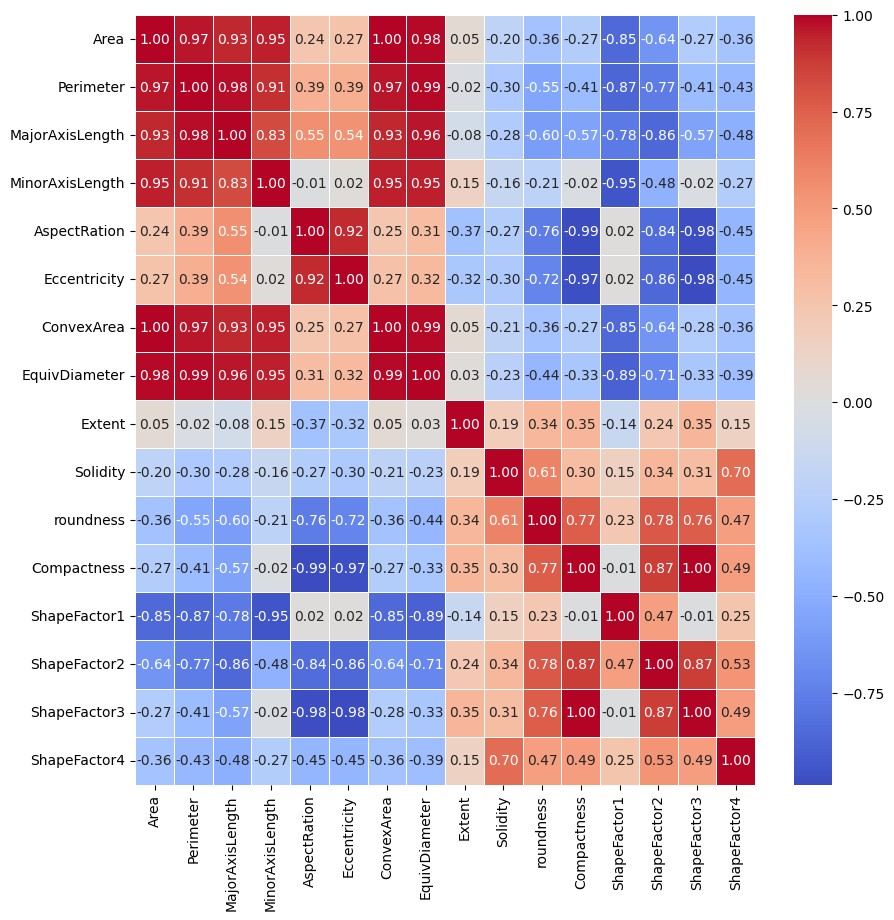

In [7]:
# Draw heatmap, pair plot
corr_matrix = X.corr()
plt.clf()
plt.figure(figsize=(10, 10))
sns.heatmap(
    corr_matrix,
    annot=True,        # show correlation values
    cmap='coolwarm',   # color map
    fmt='.2f',         # decimal format
    linewidths=0.5
)
plt.show()

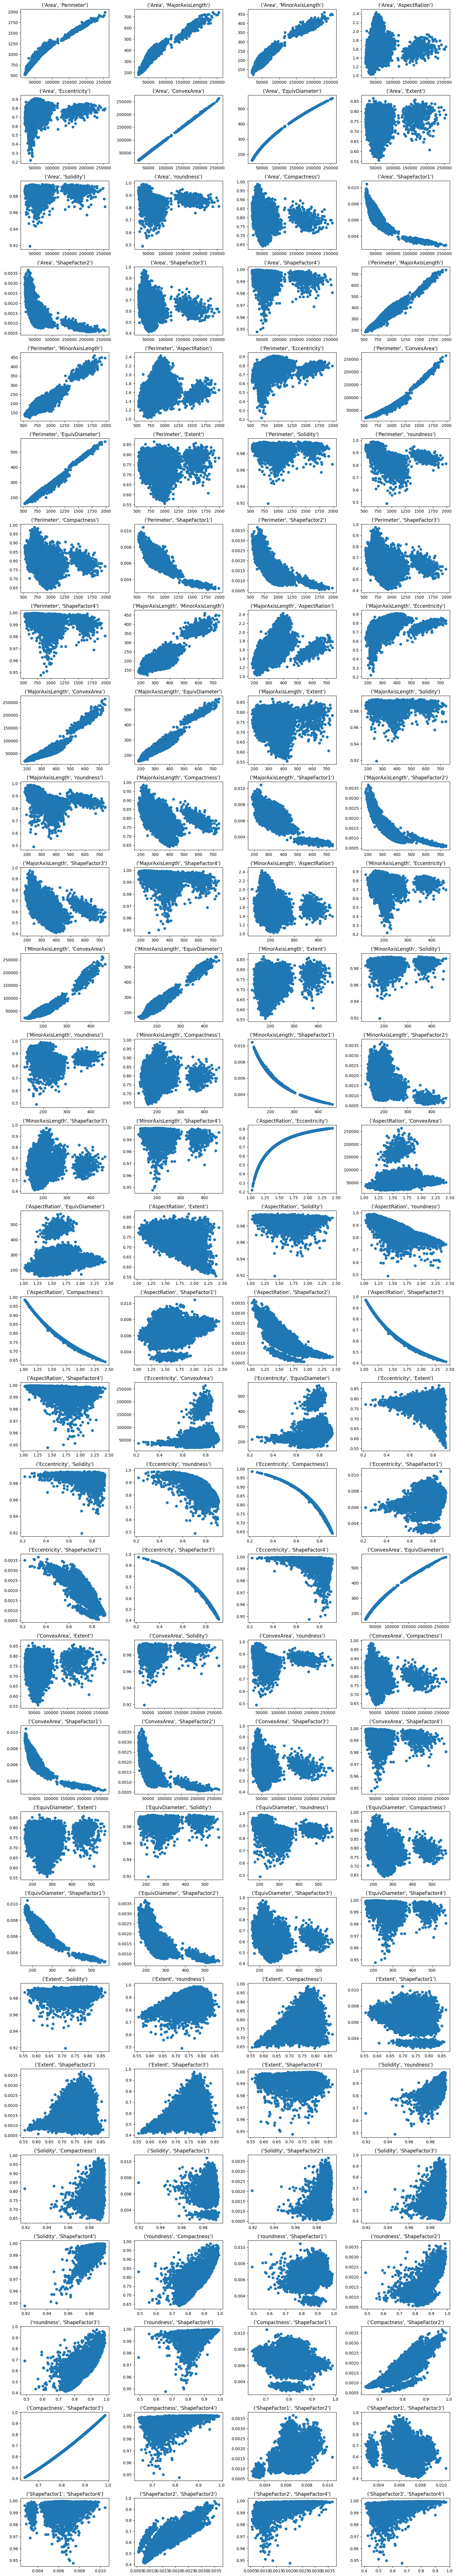

In [8]:
#Drawing graphs between different features
from itertools import combinations
col_pairs = list(combinations(X.columns, 2))# Creates pairs of two columns.
n_plots = len(col_pairs)
plots_per_row = 4

n_rows = math.ceil(n_plots / plots_per_row)

fig, axes = plt.subplots(
    n_rows,
    plots_per_row,
    figsize=(plots_per_row * 4, n_rows * 3)
)

axes = axes.flatten()

for i, col_pair in enumerate(col_pairs):
    # axes[i].hist(df[col])
    # axes[i].set_title(col)
    axes[i].scatter(df[col_pair[0]], df[col_pair[1]])
    axes[i].set_title(col_pair)
    

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [23]:
# It is clear that there are strong correlation between
# 1) Area, perimeter,MajorAxisLength, MinorAxisLength, ConvexArea, EquivDiameter

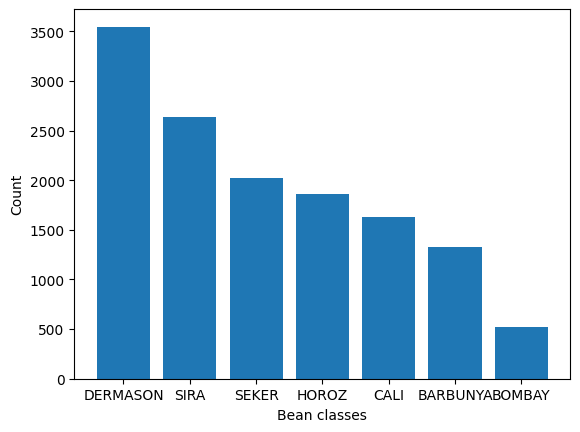

In [9]:
class_counts = y.value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Bean classes")
plt.ylabel("Count")
plt.show()

In [10]:
# Find skewness among feature variables.
skewness = X.skew()
display(skewness)

Area               2.947136
Perimeter          1.628018
MajorAxisLength    1.365813
MinorAxisLength    2.232013
AspectRation       0.589045
Eccentricity      -1.064932
ConvexArea         2.936102
EquivDiameter      1.947303
Extent            -0.895655
Solidity          -2.546877
roundness         -0.648725
Compactness        0.036309
ShapeFactor1      -0.530427
ShapeFactor2       0.294332
ShapeFactor3       0.242767
ShapeFactor4      -2.760125
dtype: float64

In [11]:
# Train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)



In [12]:
# Treating skewness
skewed_cols=['Area','Perimeter','MajorAxisLength','MinorAxisLength','Eccentricity','ConvexArea',
             'EquivDiameter','Solidity','ShapeFactor4']
from sklearn.preprocessing import PowerTransformer

# Apply PowerTransformer to skewed columns
pt = PowerTransformer(method='yeo-johnson')
X_train[skewed_cols] = pt.fit_transform(X_train[skewed_cols])
X_test[skewed_cols] = pt.transform(X_test[skewed_cols])

c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\numpy\_core\_methods.py:194: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [14]:
skewness = X_train.skew()
display(skewness)
skewness = X_test.skew()
display(skewness)

Area               0.031372
Perimeter          0.065866
MajorAxisLength    0.079514
MinorAxisLength   -0.004585
AspectRation       0.580191
Eccentricity      -0.061705
ConvexArea         0.034054
EquivDiameter      0.031585
Extent            -0.895752
Solidity          -0.134397
roundness         -0.667570
Compactness        0.041414
ShapeFactor1      -0.538988
ShapeFactor2       0.291689
ShapeFactor3       0.247026
ShapeFactor4      -0.295922
dtype: float64

Area              -0.005358
Perimeter          0.031021
MajorAxisLength    0.050268
MinorAxisLength   -0.055133
AspectRation       0.624769
Eccentricity      -0.043687
ConvexArea        -0.002756
EquivDiameter     -0.005141
Extent            -0.895787
Solidity          -0.084191
roundness         -0.566303
Compactness        0.015830
ShapeFactor1      -0.497388
ShapeFactor2       0.304917
ShapeFactor3       0.225767
ShapeFactor4      -0.291600
dtype: float64

In [13]:
# Scale X_train and X_test using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
y_train.value_counts()

Class
DERMASON    2854
SIRA        2101
SEKER       1624
HOROZ       1485
CALI        1302
BARBUNYA    1061
BOMBAY       407
Name: count, dtype: int64

In [14]:
#Performing oversampling
from imblearn.combine import SMOTETomek

smotemek = SMOTETomek(random_state=3)
X_train, y_train = smotemek.fit_resample(X_train, y_train)
display(y_train.value_counts())

Class
BOMBAY      2854
BARBUNYA    2846
CALI        2844
HOROZ       2843
SEKER       2830
DERMASON    2761
SIRA        2758
Name: count, dtype: int64

In [15]:
# Calculate vif for multicollinearity detection.
# There is very high vif which shows strong multi collinearity.

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif_df = pd.DataFrame()
    vif_df["Feature"] = X.columns
    vif_df["VIF"] = [
        variance_inflation_factor(X.values, i)
        for i in range(X.shape[1])
    ]
    return vif_df

vif_df=calculate_vif(X)
display(vif_df)

,Feature,VIF
0,Area,3.443408e+05
1,Perimeter,6.021611e+04
2,MajorAxisLength,1.317358e+06
3,MinorAxisLength,1.652830e+06
4,AspectRation,1.682818e+05
5,Eccentricity,2.341323e+04
6,ConvexArea,3.321269e+05
7,EquivDiameter,6.100438e+06
8,Extent,2.933328e+02
9,Solidity,6.280427e+05


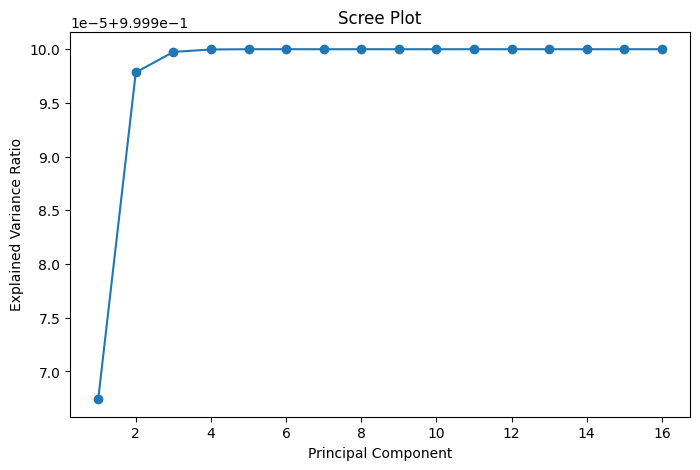

array([9.99967413e-01, 3.04291274e-05, 1.90471380e-06, 2.27743351e-07,
       2.46466853e-08, 3.54591988e-10, 1.15508582e-12, 7.41396665e-13,
       1.18007490e-13, 3.19618527e-14, 7.18769158e-15, 1.19286596e-15,
       2.01672727e-16, 6.12710652e-18, 4.55377466e-18, 1.47788067e-19])

In [16]:
# Drawing scree plot.
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X)

plt.figure(figsize=(8,5))
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    np.cumsum(pca.explained_variance_ratio_),
    marker='o'
)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.show()
display(pca.explained_variance_ratio_)

In [17]:
# Apply PCA on X features. fit_transform on X_train and transform on X_test to prevent Data leakage.
pca = PCA(n_components=2, random_state=2)

X_train_pca = pca.fit_transform(X_train)
X_train_pca = pd.DataFrame(
    X_train_pca,
    columns=[f"PC{i+1}" for i in range(X_train_pca.shape[1])]
)

X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(
    X_test_pca,
    columns=[f"PC{i+1}" for i in range(X_test_pca.shape[1])]
)

display(X_train_pca)
display(X_test_pca)

,PC1,PC2
0,-6.188711,1.781614
1,5.365149,-2.177580
2,1.665679,4.050464
3,2.015159,0.459390
4,-1.317908,0.209775
...,...,...
19731,-2.270718,-0.786319
19732,-1.797636,0.208462
19733,-1.482782,-0.875181
19734,-0.696529,0.501759


,PC1,PC2
0,0.652350,1.104588
1,-4.228890,0.443221
2,-4.928212,0.336460
3,0.634162,0.337828
4,4.883215,-2.553933
...,...,...
2704,-2.367982,-2.277698
2705,1.768432,-2.443670
2706,-5.845573,1.877994
2707,-2.798066,-1.899708


In [31]:
def print_stats(model, model_name, X_train,X_test, y_train,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} : Accuracy: test", accuracy_score(y_test, y_pred))
    print("\nConfusion Matrix:test\n", confusion_matrix(y_test, y_pred))
    print("\nClassification Report:test\n", classification_report(y_test, y_pred))

    y_pred = model.predict(X_train)
    print(f"{model_name} : Accuracy:train", accuracy_score(y_train, y_pred))
    print("\nConfusion Matrix:train\n", confusion_matrix(y_train, y_pred))
    print("\nClassification Report:train\n", classification_report(y_train, y_pred))

In [37]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold

lr = LogisticRegression()

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(lr,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("Logistic regression: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")
print_stats(lr,"Logistic Regression",X_train_pca, X_test_pca, y_train,y_test)



'Logistic regression: Cross Validation Accuracy scores:'

array([0.8766464 , 0.87712186, 0.86952116, 0.87129465, 0.86774766])

'Mean Accuracy:'

np.float64(0.8724663467746014)

'============================================================'

Logistic Regression : Accuracy: test 0.8667404946474714

Confusion Matrix:test
 [[185   0  63   0   1   1  11]
 [  0 115   0   0   0   0   0]
 [ 65   0 254   0   5   1   3]
 [  0   0   0 626   1  10  55]
 [  1   0  15   5 339   0  15]
 [  6   0   0   6   0 380  11]
 [ 14   0   0  40  15  17 449]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.68      0.71      0.70       261
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.77      0.77      0.77       328
    DERMASON       0.92      0.90      0.91       692
       HOROZ       0.94      0.90      0.92       375
       SEKER       0.93      0.94      0.94       403
        SIRA       0.83      0.84      0.83       535

    accuracy                           0.87      2709
   macro avg       0.87      0.87      0.87      2709
weighted avg       0.87      0.87      0.87      2709

Logistic Regression : Accuracy:train 0.8726692338873125

Confusion Matrix:tr

In [38]:
# Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2) 

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}  

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=3
) 
grid_search.fit(X_train_pca, y_train)
best_rf = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(best_rf,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("Random Forest: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(best_rf,"Random Forest",X_train_pca, X_test_pca, y_train,y_test)

c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan]
  warnings.warn(


'Random Forest: Cross Validation Accuracy scores:'

array([0.87791287, 0.87509501, 0.87762858, 0.87306815, 0.87382822])

'Mean Accuracy:'

np.float64(0.8755065663609184)

'============================================================'

Random Forest : Accuracy: test 0.8501291989664083

Confusion Matrix:test
 [[174   0  77   0   3   1   6]
 [  0 115   0   0   0   0   0]
 [ 73   0 246   0   6   1   2]
 [  0   0   0 630   3  10  49]
 [  5   0  14   7 337   0  12]
 [  6   0   0  11   0 375  11]
 [ 24   0   0  53  13  19 426]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.62      0.67      0.64       261
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.73      0.75      0.74       328
    DERMASON       0.90      0.91      0.90       692
       HOROZ       0.93      0.90      0.91       375
       SEKER       0.92      0.93      0.93       403
        SIRA       0.84      0.80      0.82       535

    accuracy                           0.85      2709
   macro avg       0.85      0.85      0.85      2709
weighted avg       0.85      0.85      0.85      2709

Random Forest : Accuracy:train 0.9995946493717065

Confusion Matrix:train
 [[2843 

In [43]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'ccp_alpha': [0.0, 0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                        
    scoring='neg_mean_squared_error',
    n_jobs=3)

grid_search.fit(X_train_pca, y_train)
best_dt = grid_search.best_estimator_

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(best_dt,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("Decision Tree: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(best_dt,"Decision Tree",X_train_pca, X_test_pca, y_train,y_test)

c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


'Decision Tree: Cross Validation Accuracy scores:'

array([0.55091185, 0.54598429, 0.54927793, 0.54902458, 0.54978465])

'Mean Accuracy:'

np.float64(0.5489966601543399)

'============================================================'

Decision Tree : Accuracy: test 0.5489110372831303

Confusion Matrix:test
 [[  0 241   0   8   0  12   0]
 [  0 115   0   0   0   0   0]
 [  0 326   0   0   1   1   0]
 [  0   0   0 685   0   7   0]
 [  0  26   0  36 313   0   0]
 [  0   0   0  29   0 374   0]
 [  0  43   0 471  10  11   0]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00       261
      BOMBAY       0.15      1.00      0.27       115
        CALI       0.00      0.00      0.00       328
    DERMASON       0.56      0.99      0.71       692
       HOROZ       0.97      0.83      0.90       375
       SEKER       0.92      0.93      0.93       403
        SIRA       0.00      0.00      0.00       535

    accuracy                           0.55      2709
   macro avg       0.37      0.54      0.40      2709
weighted avg       0.42      0.55      0.46      2709

Decision Tree : Accuracy:train 0.5491487636805837


c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i


Confusion Matrix:train
 [[   0 2633    0  114   31   68    0]
 [   0 2854    0    0    0    0    0]
 [   0 2783    0    5   49    7    0]
 [   0    0    0 2732    0   29    0]
 [   0  109    0  135 2599    0    0]
 [   0    1    0  176    0 2653    0]
 [   0  181    0 2491   58   28    0]]


c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:train
               precision    recall  f1-score   support

    BARBUNYA       0.00      0.00      0.00      2846
      BOMBAY       0.33      1.00      0.50      2854
        CALI       0.00      0.00      0.00      2844
    DERMASON       0.48      0.99      0.65      2761
       HOROZ       0.95      0.91      0.93      2843
       SEKER       0.95      0.94      0.94      2830
        SIRA       0.00      0.00      0.00      2758

    accuracy                           0.55     19736
   macro avg       0.39      0.55      0.43     19736
weighted avg       0.39      0.55      0.43     19736



c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\wbari\anaconda3\envs\deep_learning\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# SVM
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(svm_model,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("SVC: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(svm_model,"SVC",X_train_pca, X_test_pca, y_train,y_test)


'SVC: Cross Validation Accuracy scores:'

array([0.87867275, 0.87636179, 0.87332151, 0.87509501, 0.87230808])

'Mean Accuracy:'

np.float64(0.8751518280848394)

'============================================================'

SVC : Accuracy: test 0.873015873015873

Confusion Matrix:test
 [[178   0  71   0   3   1   8]
 [  0 115   0   0   0   0   0]
 [ 56   0 263   0   5   1   3]
 [  0   0   0 635   2   9  46]
 [  6   0  10   2 342   0  15]
 [  4   0   0   6   0 379  14]
 [ 11   0   0  44  14  13 453]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.70      0.68      0.69       261
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.76      0.80      0.78       328
    DERMASON       0.92      0.92      0.92       692
       HOROZ       0.93      0.91      0.92       375
       SEKER       0.94      0.94      0.94       403
        SIRA       0.84      0.85      0.84       535

    accuracy                           0.87      2709
   macro avg       0.87      0.87      0.87      2709
weighted avg       0.87      0.87      0.87      2709

SVC : Accuracy:train 0.8751013376570733

Confusion Matrix:train
 [[1829    2  843    0   21  

In [41]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(knn,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("KNN: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(knn,"KNN",X_train_pca, X_test_pca, y_train,y_test)

'KNN: Cross Validation Accuracy scores:'

array([0.87006079, 0.87154801, 0.86445402, 0.87484165, 0.8692678 ])

'Mean Accuracy:'

np.float64(0.8700344534689499)

'============================================================'

KNN : Accuracy: test 0.8449612403100775

Confusion Matrix:test
 [[167   0  81   0   5   0   8]
 [  0 115   0   0   0   0   0]
 [ 79   0 241   0   5   1   2]
 [  0   0   0 627   2  10  53]
 [  5   0  11   6 340   1  12]
 [  6   0   0  11   0 376  10]
 [ 25   0   0  58  13  16 423]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.59      0.64      0.62       261
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.72      0.73      0.73       328
    DERMASON       0.89      0.91      0.90       692
       HOROZ       0.93      0.91      0.92       375
       SEKER       0.93      0.93      0.93       403
        SIRA       0.83      0.79      0.81       535

    accuracy                           0.84      2709
   macro avg       0.84      0.84      0.84      2709
weighted avg       0.85      0.84      0.85      2709

KNN : Accuracy:train 0.9081880826915282

Confusion Matrix:train
 [[2224    2  516    0   16 

In [42]:
# XGBoost
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded=le.transform(y_test)

xgb = xgb.XGBClassifier(objective='multi:softmax', num_class=7, n_estimators=100, max_depth=3, 
                          learning_rate=0.1, random_state=7)
cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(xgb,X_train_pca,y_train_encoded,cv=cv,scoring='accuracy')
display("XGBoost: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(xgb,"XGBoost",X_train_pca, X_test_pca, y_train_encoded,y_test_encoded)

'XGBoost: Cross Validation Accuracy scores:'

array([0.87968592, 0.88092222, 0.87028123, 0.87965543, 0.8710413 ])

'Mean Accuracy:'

np.float64(0.8763172188539692)

'============================================================'

XGBoost : Accuracy: test 0.873015873015873

Confusion Matrix:test
 [[170   0  79   0   2   1   9]
 [  0 115   0   0   0   0   0]
 [ 47   0 272   0   5   1   3]
 [  0   0   0 636   2   9  45]
 [  4   0  12   3 341   0  15]
 [  7   0   0   5   0 381  10]
 [ 12   0   1  43  12  17 450]]

Classification Report:test
               precision    recall  f1-score   support

           0       0.71      0.65      0.68       261
           1       1.00      1.00      1.00       115
           2       0.75      0.83      0.79       328
           3       0.93      0.92      0.92       692
           4       0.94      0.91      0.93       375
           5       0.93      0.95      0.94       403
           6       0.85      0.84      0.84       535

    accuracy                           0.87      2709
   macro avg       0.87      0.87      0.87      2709
weighted avg       0.87      0.87      0.87      2709

XGBoost : Accuracy:train 0.8814349412241589

Confusion Matrix:train
 [[1793    1  892    

In [45]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier = BaggingClassifier(estimator=lr, n_estimators=10, max_samples=0.8,
    max_features=1.0,bootstrap=True,random_state=7)

cv = StratifiedKFold(n_splits=5,shuffle=True, random_state=7)
scores = cross_val_score(bagging_classifier,X_train_pca,y_train,cv=cv,scoring='accuracy')
display("Bagging: Cross Validation Accuracy scores:", scores)
display("Mean Accuracy:", np.mean(scores))
display("============================================================")

print_stats(bagging_classifier,"Bagging",X_train_pca, X_test_pca, y_train,y_test)

'Bagging: Cross Validation Accuracy scores:'

array([0.87639311, 0.87585508, 0.86901444, 0.87078794, 0.8674943 ])

'Mean Accuracy:'

np.float64(0.8719089742533349)

'============================================================'

Bagging : Accuracy: test 0.8652639350313769

Confusion Matrix:test
 [[186   0  62   0   1   1  11]
 [  0 115   0   0   0   0   0]
 [ 69   0 250   0   5   1   3]
 [  0   0   0 625   1  10  56]
 [  1   0  15   5 339   0  15]
 [  6   0   0   6   0 380  11]
 [ 13   0   0  40  16  17 449]]

Classification Report:test
               precision    recall  f1-score   support

    BARBUNYA       0.68      0.71      0.69       261
      BOMBAY       1.00      1.00      1.00       115
        CALI       0.76      0.76      0.76       328
    DERMASON       0.92      0.90      0.91       692
       HOROZ       0.94      0.90      0.92       375
       SEKER       0.93      0.94      0.94       403
        SIRA       0.82      0.84      0.83       535

    accuracy                           0.87      2709
   macro avg       0.86      0.87      0.87      2709
weighted avg       0.87      0.87      0.87      2709

Bagging : Accuracy:train 0.872111876773409

Confusion Matrix:train
 [[1903    2  779    

In [46]:
# Saving models:
import joblib
joblib.dump(lr, 'model.pkl')
joblib.dump(pt, 'power_transformer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(pca, 'pca.pkl')

['pca.pkl']